In [4]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np
import math
from datetime import datetime
import cv2

In [17]:
# Define some common functions
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize = (15, 15),
                   maxLevel = 2,
                   criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

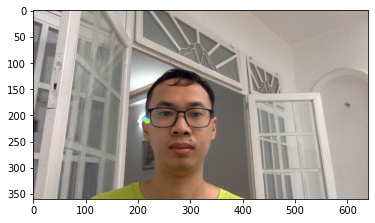

In [18]:
orig_old = pil.Image.open("../../Image/old_frame.jpg")
orig_new = pil.Image.open("../../Image/frame.jpg")
oldimg = img2array(orig_old)
newimg = img2array(orig_new)
plt.imshow(oldimg)

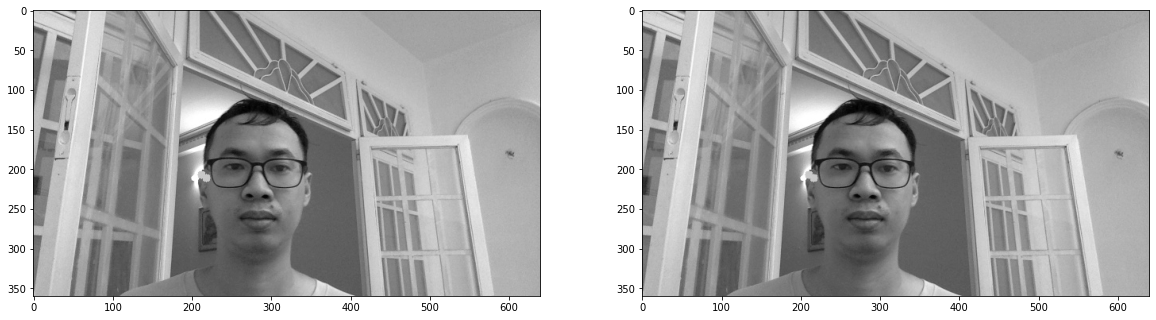

In [19]:
oldgray = rgb2gray(oldimg)
newgray = rgb2gray(newimg)

# old vs. new
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(oldgray, cmap='gray')
axarr[1].imshow(newgray, cmap='gray')


In [22]:
p0 = cv2.goodFeaturesToTrack(np.uint8(oldgray), mask = None, **feature_params)
p1, st, err = cv2.calcOpticalFlowPyrLK(np.uint8(oldgray), np.uint8(newgray), p0, None, **lk_params)

In [23]:
good_old = p0[st==1]

In [24]:
print(good_old)

[[215. 202.]
 [532. 172.]
 [214. 169.]
 [ 32.  33.]
 [ 43. 140.]
 [211. 213.]
 [ 52.   1.]
 [464. 156.]
 [220. 213.]
 [414. 158.]
 [ 41. 149.]
 [ 12. 150.]
 [351. 108.]
 [ 46.  39.]
 [  8. 286.]
 [281.  75.]
 [350.  62.]
 [200. 211.]
 [406. 164.]
 [ 16.  28.]
 [ 28. 154.]
 [299.  64.]
 [339. 186.]
 [286. 198.]
 [432. 148.]
 [317. 100.]
 [385.  83.]
 [307.  64.]
 [277.  81.]
 [472. 156.]
 [287.  86.]
 [ 28. 185.]
 [308.  72.]
 [333.  81.]]
